In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix, f1_score
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import precision_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import learning_curve

/Users/bimalkilambu/anaconda3/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [2]:
cancerTypes = ['cesc','acc','laml','esca','dlbc','blca','hnsc','pcpg','kich','lgg']
fileName = lambda x: x + '_cancer.csv'
# Create an empty dataframe to store the combined data
cancerData_df = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for cancerType in cancerTypes:
    #print("data/" + fileName(cancerType))
    df = pd.read_csv("data/" + fileName(cancerType))
    df = df[df['project_id' ].str.contains(',')==False]
    df['project_id'] = df['project_id'].apply(lambda x: x.replace('TCGA-', ''))
    cancerData_df = pd.concat([cancerData_df, df])

cancerData_df = shuffle(cancerData_df, random_state=42)
cancerData_df.to_csv("data/project_cancer_data.csv", index=False)

In [3]:
cancerData_df.head()

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
1330,chr1,18481975,18481976,C>T,1,.,18481975,18481976,"0,0,0",1,...,--,35.261707989,--,165.0,female,CESC,not reported,TCGA-IR-A3LK-01A-12D-A20U-09,TCGA-IR-A3LK-10A-01D-A20U-09,b79558c5-1db2-4b1e-a7b8-efbd19aa855e
85937,chr17,43941524,43941525,C>T,1,.,43941524,43941525,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-CN-4735-01A-01D-1434-08,TCGA-CN-4735-10A-01D-1434-08,fe844945-3ea9-449e-993c-df392fabcfd0
90056,chr12,122994868,122994870,insGGG,1,.,122994868,122994870,"0,0,0",1,...,--,26.0043827611,--,185.0,male,BLCA,not hispanic or latino,TCGA-GU-A42Q-01A-11D-A23U-08,TCGA-GU-A42Q-10A-01D-A23U-08,9c46846e-7f66-4936-af97-50a7b8189d84
35423,chr6,99468550,99468551,C>G,1,.,99468550,99468551,"0,0,0",1,...,--,17.6308539945,--,165.0,female,CESC,not hispanic or latino,TCGA-4J-AA1J-01A-21D-A387-09,TCGA-4J-AA1J-10A-01D-A38A-09,53eac147-7eb8-4c54-a982-5e058d6749f8
34106,chr21,42288295,42288296,G>C,1,.,42288295,42288296,"0,0,0",1,...,--,--,--,--,male,LGG,not hispanic or latino,TCGA-DU-A7TD-01A-12D-A34A-08,TCGA-DU-A7TD-10A-01D-A34A-08,e349d8aa-bb82-4ce8-b14c-61216289f25b


In [4]:
cancerData_df = pd.read_csv('data/project_cancer_data.csv')

In [5]:
cancerData_df.head()

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
0,chr1,18481975,18481976,C>T,1,.,18481975,18481976,"0,0,0",1,...,--,35.261707989,--,165.0,female,CESC,not reported,TCGA-IR-A3LK-01A-12D-A20U-09,TCGA-IR-A3LK-10A-01D-A20U-09,b79558c5-1db2-4b1e-a7b8-efbd19aa855e
1,chr17,43941524,43941525,C>T,1,.,43941524,43941525,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-CN-4735-01A-01D-1434-08,TCGA-CN-4735-10A-01D-1434-08,fe844945-3ea9-449e-993c-df392fabcfd0
2,chr12,122994868,122994870,insGGG,1,.,122994868,122994870,"0,0,0",1,...,--,26.0043827611,--,185.0,male,BLCA,not hispanic or latino,TCGA-GU-A42Q-01A-11D-A23U-08,TCGA-GU-A42Q-10A-01D-A23U-08,9c46846e-7f66-4936-af97-50a7b8189d84
3,chr6,99468550,99468551,C>G,1,.,99468550,99468551,"0,0,0",1,...,--,17.6308539945,--,165.0,female,CESC,not hispanic or latino,TCGA-4J-AA1J-01A-21D-A387-09,TCGA-4J-AA1J-10A-01D-A38A-09,53eac147-7eb8-4c54-a982-5e058d6749f8
4,chr21,42288295,42288296,G>C,1,.,42288295,42288296,"0,0,0",1,...,--,--,--,--,male,LGG,not hispanic or latino,TCGA-DU-A7TD-01A-12D-A34A-08,TCGA-DU-A7TD-10A-01D-A34A-08,e349d8aa-bb82-4ce8-b14c-61216289f25b


In [6]:
cancerData_df.tail()

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
446577,chr12,52258357,52258358,G>A,1,.,52258357,52258358,"0,0,0",1,...,--,23.6340330075,--,158.0,male,BLCA,not hispanic or latino,TCGA-UY-A9PH-01A-11D-A38G-08,TCGA-UY-A9PH-10A-01D-A38J-08,cd10dc46-356a-420b-b3f5-9e4ed4e7ecab
446578,chr11,28023818,28023819,C>T,1,.,28023818,28023819,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-CV-7446-01A-11D-2229-08,TCGA-CV-7446-10A-01D-2229-08,c4ad0479-8bef-4876-b423-fe83f222a60a
446579,chr3,129290786,129290787,C>G,1,.,129290786,129290787,"0,0,0",1,...,--,23.3234180638,--,172.0,male,ESCA,not hispanic or latino,TCGA-Z6-A8JD-01A-11D-A36J-09,TCGA-Z6-A8JD-10A-01D-A36M-09,b997d486-8c71-4926-9df1-d2afdaf2785f
446580,chr10,16918677,16918678,C>G,1,.,16918677,16918678,"0,0,0",1,...,--,24.6913580247,--,180.0,male,ESCA,not reported,TCGA-2H-A9GK-01A-11D-A37C-09,TCGA-2H-A9GK-11A-11D-A37F-09,61df8a4b-95f8-40ab-a252-d00c4300c290
446581,chr19,43997489,43997490,G>A,1,.,43997489,43997490,"0,0,0",1,...,--,--,--,--,male,LAML,not hispanic or latino,TCGA-AB-2828-03B-01W-0728-08,TCGA-AB-2828-11B-01W-0728-08,fc4ae4f8-f66b-4137-9821-e579b339cbf6


In [7]:
cancerData_df.shape

(446582, 37)

In [8]:
cancerData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446582 entries, 0 to 446581
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   #"chrom"                     446582 non-null  object 
 1   chromStart                   446582 non-null  int64  
 2   chromEnd                     446582 non-null  int64  
 3   name                         446582 non-null  object 
 4   score                        446582 non-null  int64  
 5   strand                       446582 non-null  object 
 6   thickStart                   446582 non-null  int64  
 7   thickEnd                     446582 non-null  int64  
 8   reserved                     446582 non-null  object 
 9   blockCount                   446582 non-null  int64  
 10  blockSizes                   446582 non-null  int64  
 11  chromStarts                  446582 non-null  int64  
 12  sampleCount                  446582 non-null  int64  
 13 

In [9]:
cancerData_df.describe()

,chromStart,chromEnd,score,thickStart,thickEnd,blockCount,blockSizes,chromStarts,sampleCount,freq,Entrez_Gene_Id
count,4.465820e+05,4.465820e+05,446582.0,4.465820e+05,4.465820e+05,446582.0,446582.000000,446582.0,446582.0,446582.000000,4.465820e+05
mean,7.710372e+07,7.710372e+07,1.0,7.710372e+07,7.710372e+07,1.0,1.162835,0.0,1.0,0.003577,7.166030e+05
std,5.693866e+07,5.693866e+07,0.0,5.693866e+07,5.693866e+07,0.0,2.038783,0.0,0.0,0.003434,8.047345e+06
min,1.324600e+04,1.324700e+04,1.0,1.324600e+04,1.324700e+04,1.0,1.000000,0.0,1.0,0.001969,0.000000e+00
25%,3.264799e+07,3.264799e+07,1.0,3.264799e+07,3.264799e+07,1.0,1.000000,0.0,1.0,0.001969,6.334000e+03
50%,6.286310e+07,6.286310e+07,1.0,6.286310e+07,6.286310e+07,1.0,1.000000,0.0,1.0,0.002427,2.374200e+04
75%,1.143515e+08,1.143515e+08,1.0,1.143515e+08,1.143515e+08,1.0,1.000000,0.0,1.0,0.003460,8.393100e+04
max,2.489183e+08,2.489183e+08,1.0,2.489183e+08,2.489183e+08,1.0,200.000000,0.0,1.0,0.027027,1.071335e+08


In [10]:
cancerData_df.describe(include='O')

,"#""chrom""",name,strand,reserved,Hugo_Symbol,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
count,446582,446582,446582,446582,446582,446582,446582,446582,446582,446582,...,446582,446582,446582,446582,446582,446582,446582,446582,446582,446582
unique,24,7136,1,1,20921,18,3,3519,3519,3607,...,1,673,46,71,3,10,4,2417,2417,2417
top,chr1,C>T,.,"0,0,0",TTN,Missense_Mutation,SNP,C,C,T,...,--,--,--,--,male,BLCA,not hispanic or latino,TCGA-2W-A8YY-01A-11D-A37N-09,TCGA-2W-A8YY-10A-01D-A37N-09,5aeac31a-176a-4f93-a376-a93a670821bb
freq,45966,108998,446582,446582,1715,232872,422702,180076,180076,147394,...,446582,192071,417133,191255,238376,131788,340697,18382,18382,18382


In [11]:
cancerData_df.isnull().sum()

#"chrom"                            0
chromStart                          0
chromEnd                            0
name                                0
score                               0
strand                              0
thickStart                          0
thickEnd                            0
reserved                            0
blockCount                          0
blockSizes                          0
chromStarts                         0
sampleCount                         0
freq                                0
Hugo_Symbol                         0
Entrez_Gene_Id                      0
Variant_Classification              0
Variant_Type                        0
Reference_Allele                    0
Tumor_Seq_Allele1                   0
Tumor_Seq_Allele2                   0
dbSNP_RS                        81074
dbSNP_Val_Status               392721
days_to_death                       0
cigarettes_per_day                  0
weight                              0
alcohol_hist

In [12]:
cancerData_df.columns

Index(['#"chrom"', 'chromStart', 'chromEnd', 'name', 'score', 'strand',
       'thickStart', 'thickEnd', 'reserved', 'blockCount', 'blockSizes',
       'chromStarts', 'sampleCount', 'freq', 'Hugo_Symbol', 'Entrez_Gene_Id',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'days_to_death', 'cigarettes_per_day', 'weight',
       'alcohol_history', 'alcohol_intensity', 'bmi', 'years_smoked', 'height',
       'gender', 'project_id', 'ethnicity', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'case_id'],
      dtype='object')

In [13]:
cancerData_df['Variant_Classification'].unique()

array(['Missense_Mutation', 'In_Frame_Ins', 'Silent', 'Splice_Site',
       "3'UTR", 'Nonsense_Mutation', 'Frame_Shift_Del', 'Intron', 'RNA',
       "5'UTR", 'Frame_Shift_Ins', "5'Flank", 'Splice_Region', "3'Flank",
       'In_Frame_Del', 'Translation_Start_Site', 'Nonstop_Mutation',
       'IGR'], dtype=object)

In [14]:
cancerData_df['Variant_Type'].unique()

array(['SNP', 'INS', 'DEL'], dtype=object)

In [15]:
cancerData_df.dtypes

#"chrom"                        object
chromStart                       int64
chromEnd                         int64
name                            object
score                            int64
strand                          object
thickStart                       int64
thickEnd                         int64
reserved                        object
blockCount                       int64
blockSizes                       int64
chromStarts                      int64
sampleCount                      int64
freq                           float64
Hugo_Symbol                     object
Entrez_Gene_Id                   int64
Variant_Classification          object
Variant_Type                    object
Reference_Allele                object
Tumor_Seq_Allele1               object
Tumor_Seq_Allele2               object
dbSNP_RS                        object
dbSNP_Val_Status                object
days_to_death                   object
cigarettes_per_day              object
weight                   

In [16]:
#To know, How many values available in object('categorical') type of features
#And Return Categorical values with Count.
def explore_object_type(df ,feature_name):
       if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [17]:
# Now, Test and Call a function for gender only
explore_object_type(cancerData_df, 'gender')

gender
male      238376
female    208194
--            12
Name: count, dtype: int64


In [18]:
explore_object_type(cancerData_df, 'Variant_Type')

Variant_Type
SNP    422702
DEL     14073
INS      9807
Name: count, dtype: int64


In [19]:
explore_object_type(cancerData_df, 'Variant_Classification')

Variant_Classification
Missense_Mutation         232872
Silent                     90862
3'UTR                      31678
Nonsense_Mutation          19855
Intron                     18931
5'UTR                      10483
Frame_Shift_Del             8079
RNA                         7829
Splice_Site                 5574
Frame_Shift_Ins             5562
Splice_Region               5210
3'Flank                     3639
5'Flank                     2971
In_Frame_Del                1274
In_Frame_Ins                1026
Translation_Start_Site       358
Nonstop_Mutation             323
IGR                           56
Name: count, dtype: int64


In [20]:
explore_object_type(cancerData_df, '#"chrom"')

#"chrom"
chr1     45966
chr2     31915
chr19    30478
chr11    25984
chr3     25787
chr17    24612
chr12    23771
chr6     23205
chr7     22218
chr5     21413
chrX     19165
chr4     17206
chr10    17079
chr16    17008
chr9     16687
chr8     16053
chr15    14263
chr14    14221
chr20    11293
chr22     8718
chr13     8146
chr18     6829
chr21     4404
chrY       161
Name: count, dtype: int64


In [21]:
cancerData_snp_df = cancerData_df[cancerData_df["Variant_Type"] == "SNP"]
cancerData_snp_df.head()

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
0,chr1,18481975,18481976,C>T,1,.,18481975,18481976,"0,0,0",1,...,--,35.261707989,--,165.0,female,CESC,not reported,TCGA-IR-A3LK-01A-12D-A20U-09,TCGA-IR-A3LK-10A-01D-A20U-09,b79558c5-1db2-4b1e-a7b8-efbd19aa855e
1,chr17,43941524,43941525,C>T,1,.,43941524,43941525,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-CN-4735-01A-01D-1434-08,TCGA-CN-4735-10A-01D-1434-08,fe844945-3ea9-449e-993c-df392fabcfd0
3,chr6,99468550,99468551,C>G,1,.,99468550,99468551,"0,0,0",1,...,--,17.6308539945,--,165.0,female,CESC,not hispanic or latino,TCGA-4J-AA1J-01A-21D-A387-09,TCGA-4J-AA1J-10A-01D-A38A-09,53eac147-7eb8-4c54-a982-5e058d6749f8
4,chr21,42288295,42288296,G>C,1,.,42288295,42288296,"0,0,0",1,...,--,--,--,--,male,LGG,not hispanic or latino,TCGA-DU-A7TD-01A-12D-A34A-08,TCGA-DU-A7TD-10A-01D-A34A-08,e349d8aa-bb82-4ce8-b14c-61216289f25b
5,chrX,47569995,47569996,C>T,1,.,47569995,47569996,"0,0,0",1,...,--,--,35.0,--,female,HNSC,not hispanic or latino,TCGA-CV-7568-01A-11D-2229-08,TCGA-CV-7568-10A-01D-2229-08,fa2d4258-3ee4-4d53-8ef2-9700b5cf38d6


In [22]:
explore_object_type(cancerData_snp_df, 'name')

name
C>T    108998
G>A    107800
C>G     40608
G>C     39418
G>T     28662
C>A     28363
T>C     19407
A>G     18516
T>A      8599
A>T      8207
T>G      7124
A>C      7000
Name: count, dtype: int64


In [23]:
explore_object_type(cancerData_snp_df, 'Variant_Classification')

Variant_Classification
Missense_Mutation         232828
Silent                     90862
3'UTR                      28210
Nonsense_Mutation          19213
Intron                     17467
5'UTR                       9813
RNA                         7477
Splice_Region               5033
Splice_Site                 4965
3'Flank                     3296
5'Flank                     2806
Translation_Start_Site       358
Nonstop_Mutation             318
IGR                           56
Name: count, dtype: int64


In [24]:
explore_object_type(cancerData_snp_df, '#"chrom"')

#"chrom"
chr1     43514
chr2     30231
chr19    29034
chr11    24719
chr3     24403
chr17    23156
chr12    22440
chr6     21926
chr7     21038
chr5     20276
chrX     18136
chr4     16263
chr16    16192
chr10    16182
chr9     15784
chr8     15217
chr15    13484
chr14    13349
chr20    10732
chr22     8189
chr13     7641
chr18     6472
chr21     4179
chrY       145
Name: count, dtype: int64


In [25]:
cancerData_ins_df = cancerData_df[cancerData_df["Variant_Type"] == "INS"]
cancerData_ins_df.head()

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
2,chr12,122994868,122994870,insGGG,1,.,122994868,122994870,"0,0,0",1,...,--,26.0043827611,--,185.0,male,BLCA,not hispanic or latino,TCGA-GU-A42Q-01A-11D-A23U-08,TCGA-GU-A42Q-10A-01D-A23U-08,9c46846e-7f66-4936-af97-50a7b8189d84
19,chr16,53601350,53601352,insTATA,1,.,53601350,53601352,"0,0,0",1,...,--,38.9542936288,--,152.0,female,CESC,not reported,TCGA-VS-A8QC-01A-11D-A37N-09,TCGA-VS-A8QC-10A-01D-A37N-09,cb695fdd-381e-4c00-836e-0ba27e32176b
82,chr1,110061492,110061494,insC,1,.,110061492,110061494,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-CQ-6220-01A-11D-1912-08,TCGA-CQ-6220-10A-01D-1912-08,96d0cefe-7949-4736-a7dc-1e4fa94765ec
96,chr6,139174460,139174462,insCAAAGATTTTA,1,.,139174460,139174462,"0,0,0",1,...,--,--,--,--,male,LGG,not hispanic or latino,TCGA-HT-8110-01A-11D-2395-08,TCGA-HT-8110-10A-01D-2396-08,ad1c5951-ca93-4102-889b-e28e2bcfea76
105,chr3,196584329,196584331,insCCTA,1,.,196584329,196584331,"0,0,0",1,...,--,--,--,--,male,LGG,not hispanic or latino,TCGA-HT-8110-01A-11D-2395-08,TCGA-HT-8110-10A-01D-2396-08,ad1c5951-ca93-4102-889b-e28e2bcfea76


In [26]:
explore_object_type(cancerData_ins_df, 'name')

name
insA                                               1588
insT                                               1527
insC                                                726
insG                                                697
insTT                                                78
                                                   ... 
insAGAG                                               1
insAATAATAAATATTCA                                    1
insGCATCAAAGAACATCTTCA                                1
insAGCCTCAGCTGTTGTCATTGGGGCTCACTCAAACGTATGAGGCA       1
insAAGATGTATT                                         1
Name: count, Length: 3606, dtype: int64


In [27]:
explore_object_type(cancerData_ins_df, 'Variant_Classification')

Variant_Classification
Frame_Shift_Ins      5562
3'UTR                1157
In_Frame_Ins         1026
Intron                711
Nonsense_Mutation     622
5'UTR                 264
RNA                   139
3'Flank               112
Splice_Region         105
Splice_Site            63
5'Flank                45
Nonstop_Mutation        1
Name: count, dtype: int64


In [28]:
explore_object_type(cancerData_ins_df, '#"chrom"')

#"chrom"
chr1     1009
chr2      731
chr6      578
chr3      570
chr17     568
chr19     547
chr11     538
chr12     524
chr7      490
chr5      453
chrX      399
chr4      382
chr14     371
chr10     368
chr9      365
chr8      339
chr15     324
chr16     314
chr22     225
chr13     217
chr20     211
chr18     168
chr21     109
chrY        7
Name: count, dtype: int64


In [29]:
cancerData_del_df = cancerData_df[cancerData_df["Variant_Type"] == "DEL"]
cancerData_del_df.head()

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,alcohol_intensity,bmi,years_smoked,height,gender,project_id,ethnicity,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,case_id
24,chr14,49806117,49806118,delG,1,.,49806117,49806118,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-F7-A624-01A-22D-A30E-08,TCGA-F7-A624-10A-01D-A30H-08,46e51eb2-0c5e-457b-af1a-8bac1b8a8bea
68,chr12,106886157,106886159,delTT,1,.,106886157,106886159,"0,0,0",1,...,--,35.7960457856,--,155.0,female,CESC,not reported,TCGA-IR-A3LF-01A-21D-A22X-09,TCGA-IR-A3LF-10A-01D-A22X-09,785ddea1-399d-47d8-b2b0-39e95eaa24b5
111,chr5,34845587,34845588,delA,1,.,34845587,34845588,"0,0,0",1,...,--,--,--,--,male,LGG,not hispanic or latino,TCGA-HT-8110-01A-11D-2395-08,TCGA-HT-8110-10A-01D-2396-08,ad1c5951-ca93-4102-889b-e28e2bcfea76
115,chr8,26410603,26410604,delT,1,.,26410603,26410604,"0,0,0",1,...,--,31.25,--,160.0,female,CESC,not hispanic or latino,TCGA-EA-A410-01A-11D-A243-09,TCGA-EA-A410-10A-01D-A243-09,7b356c12-b226-4e58-be7f-44e50e3eefbe
119,chr1,31365704,31365710,delAAAAAA,1,.,31365704,31365710,"0,0,0",1,...,--,29.3209876543,--,180.0,male,ESCA,not reported,TCGA-JY-A6FH-01A-11D-A33E-09,TCGA-JY-A6FH-10A-01D-A33H-09,bd1c3d3b-d174-4186-bb35-364e167a1d18


In [30]:
explore_object_type(cancerData_del_df, 'name')

name
delC                                    2107
delT                                    2076
delA                                    2049
delG                                    2032
delAA                                    230
                                        ... 
delGCAGGCTCCCCGCGGGCCCCATG                 1
delGGCTTCACCGAGGAGTCC                      1
delGTTTTCTGCGCAAGTTAG                      1
delGGAACACCCAAACTAAATTTGT                  1
delGGCCCAGCAGCCGCCTGCGGCTGGACGTCTCCA       1
Name: count, Length: 3518, dtype: int64


In [31]:
explore_object_type(cancerData_del_df, 'Variant_Classification')

Variant_Classification
Frame_Shift_Del      8079
3'UTR                2311
In_Frame_Del         1274
Intron                753
Splice_Site           546
5'UTR                 406
3'Flank               231
RNA                   213
5'Flank               120
Splice_Region          72
Missense_Mutation      44
Nonsense_Mutation      20
Nonstop_Mutation        4
Name: count, dtype: int64


In [32]:
explore_object_type(cancerData_del_df, '#"chrom"')

#"chrom"
chr1     1443
chr2      953
chr19     897
chr17     888
chr3      814
chr12     807
chr11     727
chr6      701
chr7      690
chr5      684
chrX      630
chr4      561
chr9      538
chr10     529
chr16     502
chr14     501
chr8      497
chr15     455
chr20     350
chr22     304
chr13     288
chr18     189
chr21     116
chrY        9
Name: count, dtype: int64


In [33]:
cancerData_blca_df = cancerData_df[cancerData_df['project_id' ]=='BLCA']
cancerData_hnsc_df = cancerData_df[cancerData_df['project_id' ]=='HNSC']
cancerData_cesc_df = cancerData_df[cancerData_df['project_id' ]=='CESC']

In [34]:
explore_object_type(cancerData_blca_df, 'name')

name
C>T                                         32638
G>A                                         31866
C>G                                         17359
G>C                                         16730
C>A                                          7368
                                            ...  
insAAACCCATTTTAATAAATCCATAT                     1
delCTAGATGTGATG                                 1
delCTCCAGAGAATGGCAACGCTGATTACCAGTACTACAG        1
delCTATTTACCTTACAGTAGTTTC                       1
delGGCCCAGCAGCCGCCTGCGGCTGGACGTCTCCA            1
Name: count, Length: 2169, dtype: int64


In [35]:
explore_object_type(cancerData_blca_df, 'Variant_Classification')

Variant_Classification
Missense_Mutation         73513
Silent                    28781
Nonsense_Mutation          7080
Intron                     4710
3'UTR                      4623
5'UTR                      3028
Splice_Region              1841
RNA                        1770
Splice_Site                1738
Frame_Shift_Del            1627
Frame_Shift_Ins             989
5'Flank                     678
3'Flank                     596
In_Frame_Del                339
In_Frame_Ins                214
Translation_Start_Site      130
Nonstop_Mutation            125
IGR                           6
Name: count, dtype: int64


In [36]:
explore_object_type(cancerData_hnsc_df, 'name')

name
C>T                                                                          22866
G>A                                                                          22700
C>G                                                                           8388
C>A                                                                           8121
G>C                                                                           8073
                                                                             ...  
delTCGGTCG                                                                       1
insCCTTCT                                                                        1
insAAGGTATGTATTTTAAAC                                                            1
delGCTCGAAAGCTTATCAACCCCAAGTACGCCTTGGTGTCAGGCTGCCGCCACCCGCCTGGGGAGATGATGC        1
delCCAGTCAGCCGAAGGCT                                                             1
Name: count, Length: 2058, dtype: int64


In [37]:
explore_object_type(cancerData_hnsc_df, 'Variant_Classification')

Variant_Classification
Missense_Mutation         56254
Silent                    22139
Nonsense_Mutation          4620
3'UTR                      3560
Intron                     3479
Frame_Shift_Del            2033
5'UTR                      1891
RNA                        1620
Splice_Site                1445
Frame_Shift_Ins            1363
Splice_Region              1141
5'Flank                     511
3'Flank                     447
In_Frame_Del                326
In_Frame_Ins                243
Translation_Start_Site       84
Nonstop_Mutation             63
IGR                           9
Name: count, dtype: int64


In [38]:
explore_object_type(cancerData_cesc_df, 'name')

name
C>T                   28235
G>A                   27682
C>G                   10231
G>C                   10043
G>T                    5148
                      ...  
delGCT                    1
insGAAATG                 1
delAGCTGCAGATGCGGA        1
insGAGGTTATCTA            1
insAAGATGTATT             1
Name: count, Length: 1613, dtype: int64


In [39]:
explore_object_type(cancerData_cesc_df, 'Variant_Classification')

Variant_Classification
Missense_Mutation         46394
Silent                    18602
3'UTR                     13628
Intron                     5844
Nonsense_Mutation          4182
5'UTR                      2959
RNA                        2279
Frame_Shift_Del            1541
3'Flank                    1493
Frame_Shift_Ins            1406
Splice_Region              1228
5'Flank                    1021
Splice_Site                 942
In_Frame_Ins                291
In_Frame_Del                196
Nonstop_Mutation             71
Translation_Start_Site       60
IGR                          20
Name: count, dtype: int64


In [40]:
# Getting number of unique values in each column
result_df = pd.DataFrame(cancerData_df.nunique(), columns=['No. of Unique Values']).sort_values(by='No. of Unique Values')
print(result_df.to_string())

                             No. of Unique Values
chromStarts                                     1
score                                           1
strand                                          1
alcohol_intensity                               1
reserved                                        1
blockCount                                      1
sampleCount                                     1
alcohol_history                                 3
gender                                          3
Variant_Type                                    3
ethnicity                                       4
freq                                            9
project_id                                     10
Variant_Classification                         18
#"chrom"                                       24
dbSNP_Val_Status                               32
years_smoked                                   46
height                                         71
blockSizes                                    102


In [41]:
cancerData_df.select_dtypes(include=['int64']).columns

Index(['chromStart', 'chromEnd', 'score', 'thickStart', 'thickEnd',
       'blockCount', 'blockSizes', 'chromStarts', 'sampleCount',
       'Entrez_Gene_Id'],
      dtype='object')

In [42]:
cancerData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446582 entries, 0 to 446581
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   #"chrom"                     446582 non-null  object 
 1   chromStart                   446582 non-null  int64  
 2   chromEnd                     446582 non-null  int64  
 3   name                         446582 non-null  object 
 4   score                        446582 non-null  int64  
 5   strand                       446582 non-null  object 
 6   thickStart                   446582 non-null  int64  
 7   thickEnd                     446582 non-null  int64  
 8   reserved                     446582 non-null  object 
 9   blockCount                   446582 non-null  int64  
 10  blockSizes                   446582 non-null  int64  
 11  chromStarts                  446582 non-null  int64  
 12  sampleCount                  446582 non-null  int64  
 13 

In [43]:
# Columns to lowercase
cancerData_df.columns = cancerData_df.columns.str.lower()

# Rename columns
cancerData_df.rename(columns={'#"chrom"':'chrom', 'project_id':'cancer_type', 'variant_classification':'variant', 
                              'matched_norm_sample_barcode':'barcode'}, inplace=True)


In [44]:
# Specify the columns to split
columns_to_split = ['days_to_death', 'cigarettes_per_day', 'weight', 'alcohol_history', 'alcohol_intensity', 
                    'bmi', 'years_smoked', 'height', 'gender', 'ethnicity', 'tumor_sample_barcode', 'barcode', 'case_id']

# Convert columns to strings and then split values
cancerData_df.loc[:, columns_to_split] = cancerData_df[columns_to_split].astype(str).apply(lambda x: x.str.split(','))

# Explode the specified columns and reset the index
cancerData_df = cancerData_df.explode(columns_to_split).reset_index(drop=True)

In [45]:
cancerData_df.shape

(446582, 37)

In [46]:
# Raw data has null values with dashes '--'
cancerData_df.head(2)

,chrom,chromstart,chromend,name,score,strand,thickstart,thickend,reserved,blockcount,...,alcohol_intensity,bmi,years_smoked,height,gender,cancer_type,ethnicity,tumor_sample_barcode,barcode,case_id
0,chr1,18481975,18481976,C>T,1,.,18481975,18481976,"0,0,0",1,...,--,35.261707989,--,165.0,female,CESC,not reported,TCGA-IR-A3LK-01A-12D-A20U-09,TCGA-IR-A3LK-10A-01D-A20U-09,b79558c5-1db2-4b1e-a7b8-efbd19aa855e
1,chr17,43941524,43941525,C>T,1,.,43941524,43941525,"0,0,0",1,...,--,--,--,--,male,HNSC,not hispanic or latino,TCGA-CN-4735-01A-01D-1434-08,TCGA-CN-4735-10A-01D-1434-08,fe844945-3ea9-449e-993c-df392fabcfd0


In [47]:
# Replace '--' with nan
cancerData_df.replace('--', np.nan, inplace=True)
cancerData_df.head(2)

,chrom,chromstart,chromend,name,score,strand,thickstart,thickend,reserved,blockcount,...,alcohol_intensity,bmi,years_smoked,height,gender,cancer_type,ethnicity,tumor_sample_barcode,barcode,case_id
0,chr1,18481975,18481976,C>T,1,.,18481975,18481976,"0,0,0",1,...,NaN,35.261707989,NaN,165.0,female,CESC,not reported,TCGA-IR-A3LK-01A-12D-A20U-09,TCGA-IR-A3LK-10A-01D-A20U-09,b79558c5-1db2-4b1e-a7b8-efbd19aa855e
1,chr17,43941524,43941525,C>T,1,.,43941524,43941525,"0,0,0",1,...,NaN,NaN,NaN,NaN,male,HNSC,not hispanic or latino,TCGA-CN-4735-01A-01D-1434-08,TCGA-CN-4735-10A-01D-1434-08,fe844945-3ea9-449e-993c-df392fabcfd0


In [48]:
# Check missing values
cancerData_df.isnull().sum()

chrom                        0
chromstart                   0
chromend                     0
name                         0
score                        0
strand                       0
thickstart                   0
thickend                     0
reserved                     0
blockcount                   0
blocksizes                   0
chromstarts                  0
samplecount                  0
freq                         0
hugo_symbol                  0
entrez_gene_id               0
variant                      0
variant_type                 0
reference_allele             0
tumor_seq_allele1            0
tumor_seq_allele2            0
dbsnp_rs                 81074
dbsnp_val_status        392721
days_to_death           303162
cigarettes_per_day      268477
weight                  180568
alcohol_history         303371
alcohol_intensity       446582
bmi                     192071
years_smoked            417133
height                  191255
gender                      12
cancer_t

In [49]:
# Drop based on null values
cancerData_df.drop(columns=['dbsnp_rs', 'dbsnp_val_status', 'days_to_death', 'cigarettes_per_day', 'weight', 
                            'alcohol_history', 'alcohol_intensity', 'years_smoked', 'height', 'ethnicity', 'bmi'], inplace=True)

# Drop based on insignificance
cancerData_df.drop(columns=['case_id', 'reserved', 'blockcount', 'score', 'strand', 'chromstarts', 'samplecount', 
                            'tumor_sample_barcode', 'entrez_gene_id'], inplace=True)

In [50]:
len(cancerData_df[cancerData_df.duplicated()])

0

In [51]:
# Getting number of unique values in each column
result_df = pd.DataFrame(cancerData_df.nunique(), columns=['No. of Unique Values']).sort_values(by='No. of Unique Values')
print(result_df.to_string())

                   No. of Unique Values
gender                                2
variant_type                          3
freq                                  9
cancer_type                          10
variant                              18
chrom                                24
blocksizes                          102
barcode                            2417
reference_allele                   3519
tumor_seq_allele1                  3519
tumor_seq_allele2                  3607
name                               7136
hugo_symbol                       20921
chromend                         437444
thickend                         437444
thickstart                       437681
chromstart                       437681


In [52]:
# Save a copy of pre-processed dataset
cancerData_df.to_csv('data/project_cancerData_preprocessed.csv', index=False)

In [53]:
# Import pre-processed data
cancerData_df = pd.read_csv('data/project_cancerData_preprocessed.csv')
cancerData_df.describe()

,chromstart,chromend,thickstart,thickend,blocksizes,freq
count,4.465820e+05,4.465820e+05,4.465820e+05,4.465820e+05,446582.000000,446582.000000
mean,7.710372e+07,7.710372e+07,7.710372e+07,7.710372e+07,1.162835,0.003577
std,5.693866e+07,5.693866e+07,5.693866e+07,5.693866e+07,2.038783,0.003434
min,1.324600e+04,1.324700e+04,1.324600e+04,1.324700e+04,1.000000,0.001969
25%,3.264799e+07,3.264799e+07,3.264799e+07,3.264799e+07,1.000000,0.001969
50%,6.286310e+07,6.286310e+07,6.286310e+07,6.286310e+07,1.000000,0.002427
75%,1.143515e+08,1.143515e+08,1.143515e+08,1.143515e+08,1.000000,0.003460
max,2.489183e+08,2.489183e+08,2.489183e+08,2.489183e+08,200.000000,0.027027


In [54]:
# Total patients
cancerData_df['barcode'].nunique()

2417

In [55]:
cancerData_df = cancerData_df[cancerData_df['cancer_type' ].str.contains(',')==False]
cancerData_df['cancer_type'] = cancerData_df['cancer_type'].apply(lambda x: x.replace('TCGA-', ''))

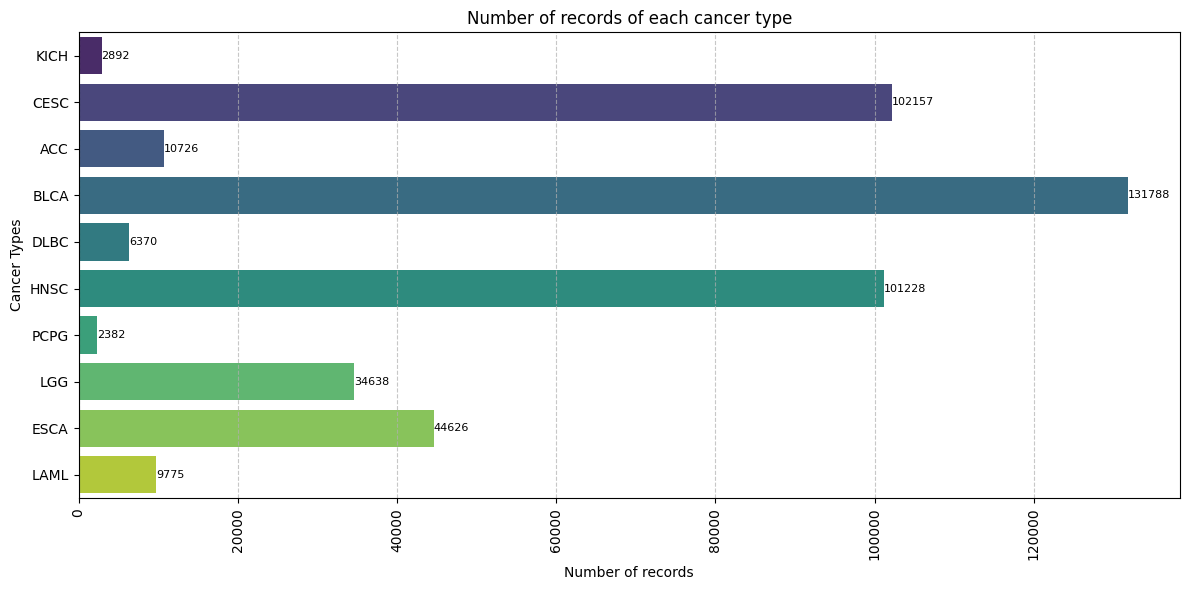

In [56]:
# Data of each cancer type
cancer_counts = cancerData_df['cancer_type'].value_counts().sample(frac=1, random_state=42)

# Graph of number of records of each cancer types
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=cancer_counts.values, y=cancer_counts.index, orient='h', palette='viridis')

# Label the bars with values
for i, v in enumerate(cancer_counts.values):
  ax.text(v + 0.2, i, str(v), color='black', va='center', fontsize=8)

# Plot graph
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Number of records')
plt.ylabel('Cancer Types')
plt.title('Number of records of each cancer type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

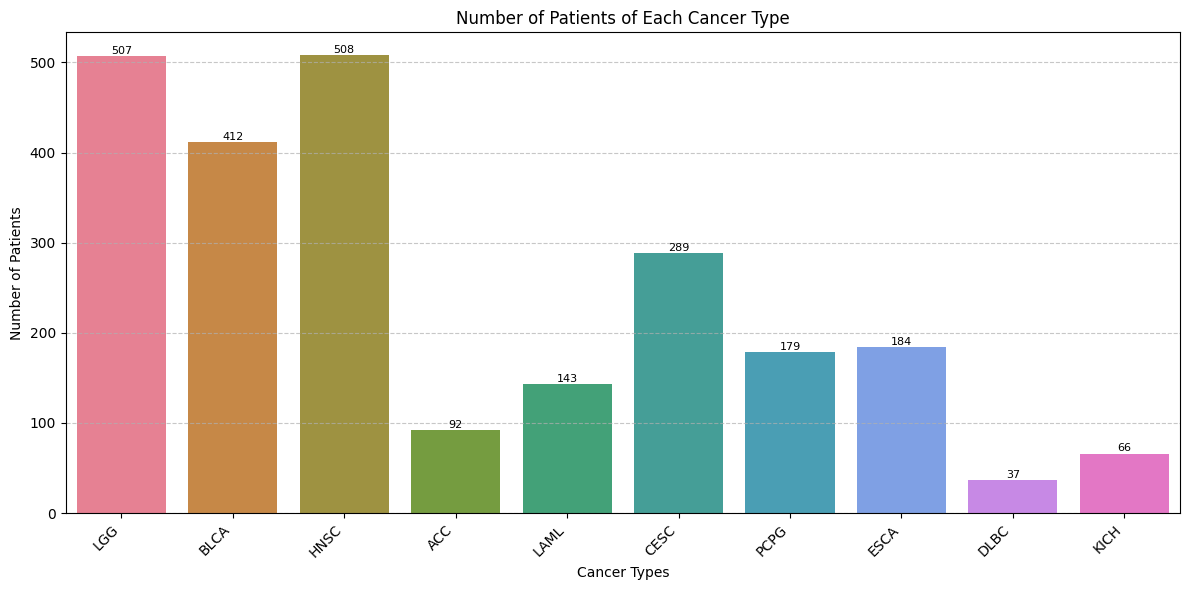

In [57]:
# Patients of each cancer type
cancer_patient_counts = cancerData_df.groupby('cancer_type')['barcode'].nunique().sample(frac=1, random_state=42)

# Graph of number of patients of each cancer types
plt.figure(figsize=(12, 6))
sns.barplot(x=cancer_patient_counts.index, y=cancer_patient_counts.values, palette='husl')


# Label each bar with its value
for i, value in enumerate(cancer_patient_counts.values):
  plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

# Plot graph
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Cancer Types')
plt.ylabel('Number of Patients')
plt.title('Number of Patients of Each Cancer Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

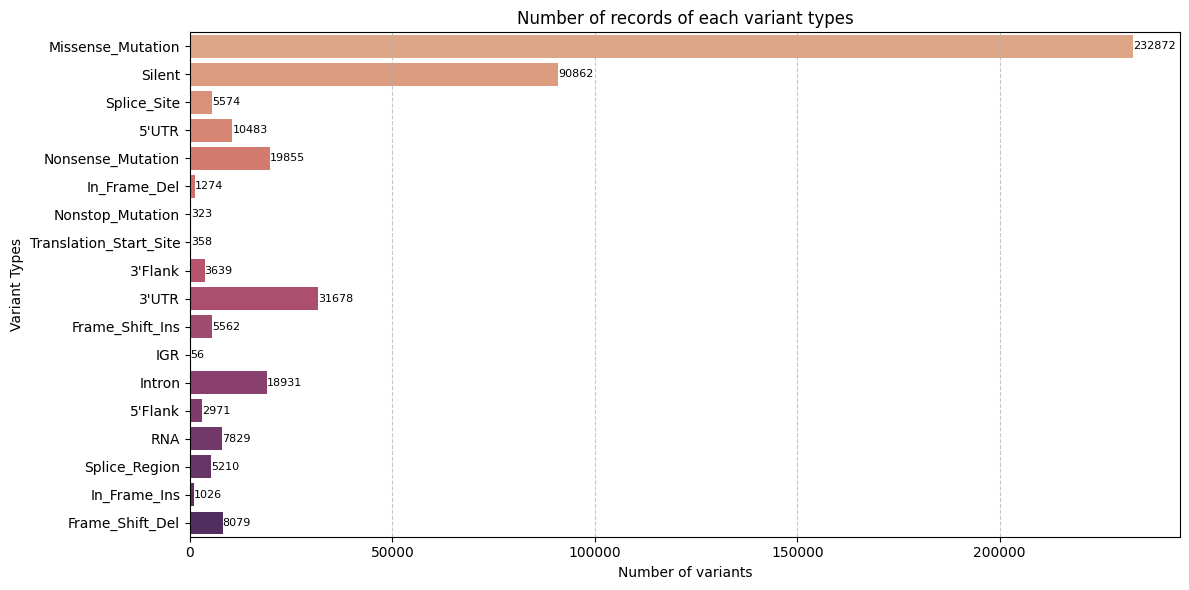

In [58]:
# Total variants
variant_counts = cancerData_df['variant'].value_counts().sample(frac=1, random_state=42)

# Graph of variant counts
plt.figure(figsize=(12, 6))
sns.barplot(x=variant_counts.values, y=variant_counts.index, orient='h', palette='flare')

# Label each bar with its value
for i, value in enumerate(variant_counts.values):
  plt.text(value + 0.1, i, str(value), ha='left', va='center', fontsize=8)

# Plot graph
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Number of variants')
plt.ylabel('Variant Types')
plt.title('Number of records of each variant types')
plt.tight_layout()
plt.show()

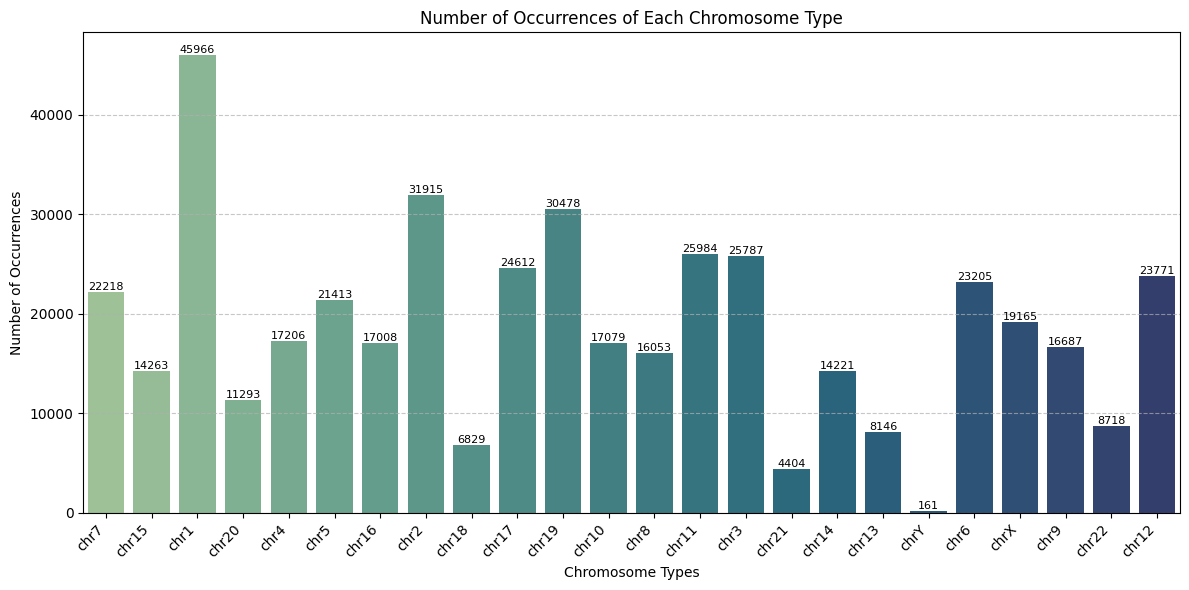

In [59]:
# Chrom counts
chrom_counts = cancerData_df['chrom'].value_counts().sample(frac=1, random_state=42)

# Graph of number of patients of each cancer types
plt.figure(figsize=(12, 6))
sns.barplot(x=chrom_counts.index, y=chrom_counts.values, palette='crest')

# Label each bar with its value
for i, value in enumerate(chrom_counts.values):
  plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Chromosome Types')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Chromosome Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

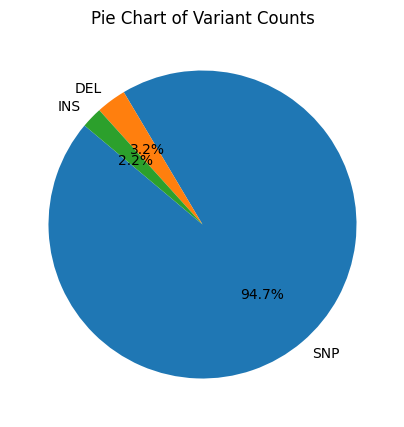

In [60]:
# Variant type counts
variant_type_counts = cancerData_df['variant_type'].value_counts()

# Plot graph
plt.figure(figsize=(5, 5))
plt.pie(variant_type_counts, labels=variant_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Variant Counts')
plt.show()

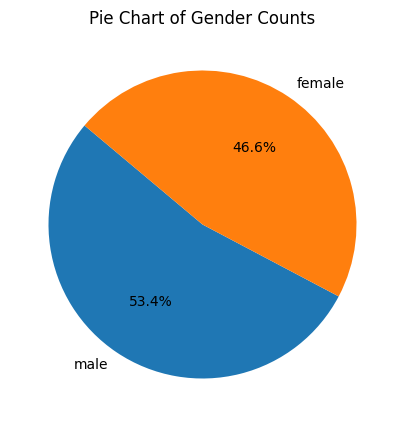

In [61]:
# Gender distribution
gender_counts = cancerData_df['gender'].value_counts()

# Plot graph
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Gender Counts')
plt.show()

In [62]:
cancerData_df.drop(columns=['barcode'], inplace=True)

In [63]:
# Label encoding
le = LabelEncoder()

# Iterate through columns and apply label encoding
for column in cancerData_df.columns:
    if cancerData_df[column].dtype == 'object':
        cancerData_df[column] = le.fit_transform(cancerData_df[column])

class_labels = {i: label for i, label in enumerate(le.classes_)}
cancerData_df.head()

,chrom,chromstart,chromend,name,thickstart,thickend,blocksizes,freq,hugo_symbol,variant,variant_type,reference_allele,tumor_seq_allele1,tumor_seq_allele2,gender,cancer_type
0,0,18481975,18481976,5,18481975,18481976,1,0.003460,9007,10,2,772,772,2627,0,2
1,8,43941524,43941525,5,43941524,43941525,1,0.001969,13784,10,2,772,772,2627,1,5
2,3,122994868,122994870,5879,122994868,122994870,2,0.002427,13270,8,1,0,0,2350,1,1
3,18,99468550,99468551,4,99468550,99468551,1,0.003460,19614,10,2,772,772,1900,0,2
4,13,42288295,42288296,7,42288295,42288296,1,0.001969,78,10,2,1690,1690,1077,1,8


In [64]:
cancerData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446582 entries, 0 to 446581
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chrom              446582 non-null  int64  
 1   chromstart         446582 non-null  int64  
 2   chromend           446582 non-null  int64  
 3   name               446582 non-null  int64  
 4   thickstart         446582 non-null  int64  
 5   thickend           446582 non-null  int64  
 6   blocksizes         446582 non-null  int64  
 7   freq               446582 non-null  float64
 8   hugo_symbol        446582 non-null  int64  
 9   variant            446582 non-null  int64  
 10  variant_type       446582 non-null  int64  
 11  reference_allele   446582 non-null  int64  
 12  tumor_seq_allele1  446582 non-null  int64  
 13  tumor_seq_allele2  446582 non-null  int64  
 14  gender             446582 non-null  int64  
 15  cancer_type        446582 non-null  int64  
dtypes:

In [65]:
# Correlation of 'cancer_type' with all features
cancerData_df.corr()['cancer_type']

chrom                0.012499
chromstart           0.007513
chromend             0.007513
name                 0.043602
thickstart           0.007513
thickend             0.007513
blocksizes           0.001565
freq                -0.051308
hugo_symbol          0.001477
variant              0.018553
variant_type        -0.042541
reference_allele     0.004841
tumor_seq_allele1    0.004841
tumor_seq_allele2   -0.013433
gender               0.030347
cancer_type          1.000000
Name: cancer_type, dtype: float64

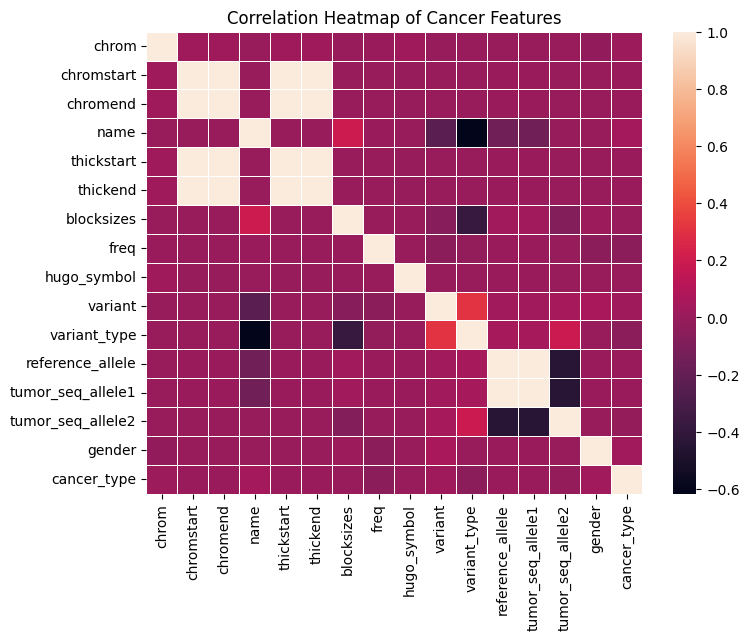

In [66]:
# Create the heatmap using the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cancerData_df.corr(), linewidths=0.5)
plt.title('Correlation Heatmap of Cancer Features')
plt.show()

In [67]:
# Select required features
cancerData_df.drop(columns=['reference_allele'], inplace=True)
cancerData_df.head()

,chrom,chromstart,chromend,name,thickstart,thickend,blocksizes,freq,hugo_symbol,variant,variant_type,tumor_seq_allele1,tumor_seq_allele2,gender,cancer_type
0,0,18481975,18481976,5,18481975,18481976,1,0.003460,9007,10,2,772,2627,0,2
1,8,43941524,43941525,5,43941524,43941525,1,0.001969,13784,10,2,772,2627,1,5
2,3,122994868,122994870,5879,122994868,122994870,2,0.002427,13270,8,1,0,2350,1,1
3,18,99468550,99468551,4,99468550,99468551,1,0.003460,19614,10,2,772,1900,0,2
4,13,42288295,42288296,7,42288295,42288296,1,0.001969,78,10,2,1690,1077,1,8


In [68]:
# Drop all duplicate rows
print(cancerData_df.shape)
cancerData_df.drop_duplicates(inplace=True)
print(cancerData_df.shape)

(446582, 15)
(446582, 15)


In [69]:
cancerData_df.to_csv('data/project_cancer_analysis.csv', index=False)

In [70]:
X = cancerData_df.drop(['cancer_type'],axis=1)
y = cancerData_df['cancer_type']
X.shape,y.shape
  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((312607, 14), (133975, 14), (312607,), (133975,))

In [71]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# Calculate the confusion matrix
def display_confusion_matrix(predicted, title):
    cm = confusion_matrix(y_test, predicted)
    
    # Create a Seaborn heatmap for the confusion matrix
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
    plt.yticks(rotation=0)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [73]:
# Cross validation
def cross_val(model, X_train, X_test, y_train, n_splits=5):
  oofs = np.zeros(len(X_train))
  preds = np.zeros(len(X_test))

  target_col = pd.DataFrame(data=y_train)

  folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
  stratified_target = pd.qcut(y_train, 10, labels=False, duplicates='drop')

  for index, (trn_idx, val_idx) in enumerate(folds.split(X_train, stratified_target)):
    print(f'\n================================ Fold {index + 1} ===================================')

    cv_X_train, cv_y_train = X_train[trn_idx], target_col.iloc[trn_idx]
    cv_X_val, cv_y_val = X_train[val_idx], target_col.iloc[val_idx]

    model.fit(cv_X_train, cv_y_train)

    val_preds = model.predict(cv_X_val)
    test_preds = model.predict(X_test)

    error = precision_score(cv_y_val, val_preds, average='macro')
    print(f'Precision is : {error}')

    oofs[val_idx] = val_preds
    preds += test_preds/n_splits

  total_error = precision_score(target_col, oofs, average='macro')
  print(f'\n Precision is {total_error}')

  return oofs, preds

In [74]:
def display_learning_curve(model, title):
    # Plot learning curves for the Logistic Regression model
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    # Calculate mean and standard deviation for training and testing scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    
    plt.legend(loc="best")
    plt.show()


In [75]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [76]:
# Random Forest
rf_pred = rf_classifier.predict(X_test)

In [77]:
# Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.9116


In [78]:
# Random Forest
rf_precision = precision_score(rf_pred, y_test, average='macro')
print(f"Random Forest Classifier Precision: {rf_precision:.4f}")

Random Forest Classifier Precision: 0.8388


In [79]:
# Calculate F1 score
rf_f1 = f1_score(y_test, rf_pred, average='macro')
print(f"Random Forest Classifier F1 Score: {rf_f1:.4f}")

Random Forest Classifier F1 Score: 0.8568


In [80]:
print("\n Random Forest Classifier Classification Report:\n")
print(classification_report(y_test, rf_pred))


 Random Forest Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3312
           1       1.00      1.00      1.00     39612
           2       1.00      1.00      1.00     30690
           3       0.96      0.91      0.93      1880
           4       0.99      1.00      0.99     13388
           5       0.79      0.88      0.83     30292
           6       0.92      0.70      0.80       866
           7       0.93      0.94      0.93      2896
           8       0.46      0.31      0.37     10348
           9       0.91      0.69      0.79       691

    accuracy                           0.91    133975
   macro avg       0.88      0.84      0.86    133975
weighted avg       0.90      0.91      0.91    133975



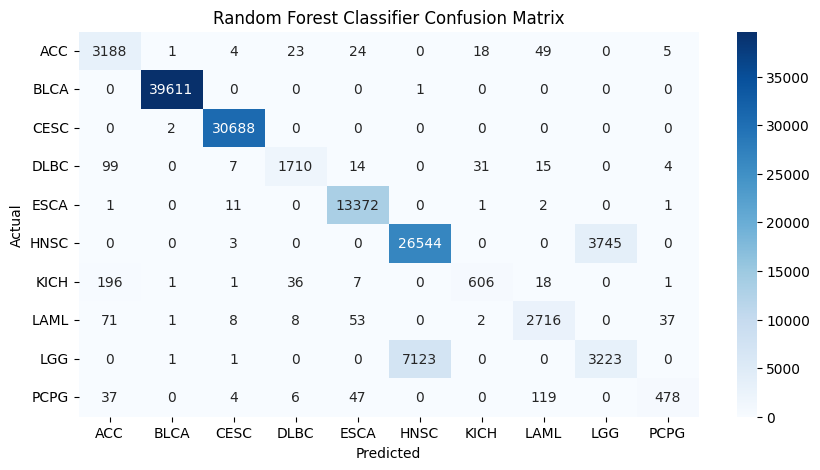

In [81]:
display_confusion_matrix(rf_pred, "Random Forest Classifier Confusion Matrix")

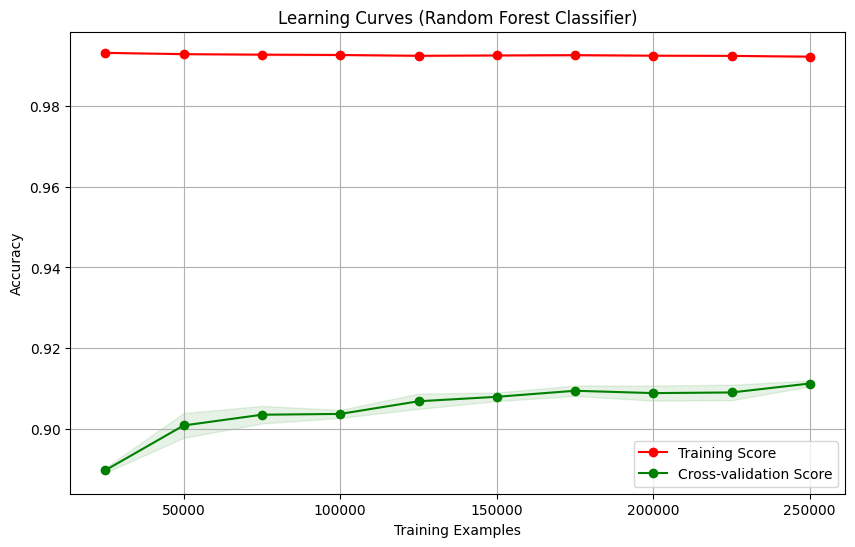

In [82]:
display_learning_curve(rf_classifier, "Learning Curves (Random Forest Classifier)")

In [83]:
# XGBoost Classifier
xgb_classifier = XGBClassifier(objective="multi:softmax", num_class=20, n_estimators=10, random_state=42)

# Cross validation
xgb_oofs, xgb_pred = cross_val(xgb_classifier, X_train, X_test, y_train, 5)


================================ Fold 1 ===================================
Precision is : 0.934788501390123

================================ Fold 2 ===================================
Precision is : 0.9344061313498051

================================ Fold 3 ===================================
Precision is : 0.9327743728250143

================================ Fold 4 ===================================
Precision is : 0.931622668504341

================================ Fold 5 ===================================
Precision is : 0.9338529808211158

 Precision is 0.9334243004940828


In [84]:
# XGBoost
xgb_pred = list(map(int, xgb_pred))

In [85]:
# XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.4f}")

XGBoost Classifier Accuracy: 0.9201


In [86]:
# XGBoost
xgb_precision = precision_score(xgb_pred, y_test, average='macro')
print(f"XGBoost Classifier Precision: {xgb_precision:.4f}")

XGBoost Classifier Precision: 0.9060


In [87]:
# XGBoost Classifier
xgb_report = classification_report(y_test, xgb_pred)
print("\nXGBoost Classifier Classification Report:\n")
print(xgb_report)


XGBoost Classifier Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3312
           1       1.00      1.00      1.00     39612
           2       1.00      1.00      1.00     30690
           3       1.00      1.00      1.00      1880
           4       1.00      1.00      1.00     13388
           5       0.77      0.95      0.85     30292
           6       0.47      1.00      0.64       866
           7       0.88      1.00      0.94      2896
           8       0.57      0.11      0.18     10348
           9       1.00      1.00      1.00       691

    accuracy                           0.92    133975
   macro avg       0.87      0.91      0.86    133975
weighted avg       0.91      0.92      0.90    133975



In [88]:
# Calculate F1 score
xgb_f1 = f1_score(y_test, xgb_pred, average='macro')
print(f"XGBoost Classifier F1 Score: {xgb_f1:.4f}")

XGBoost Classifier F1 Score: 0.8609


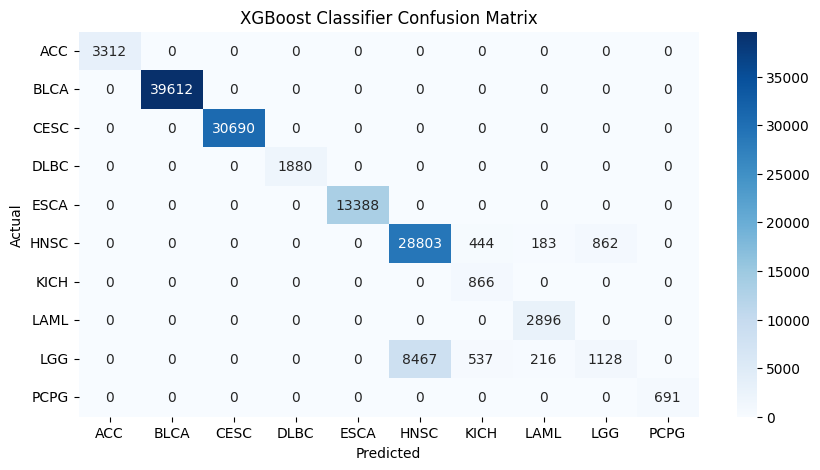

In [89]:
display_confusion_matrix(xgb_pred, "XGBoost Classifier Confusion Matrix")

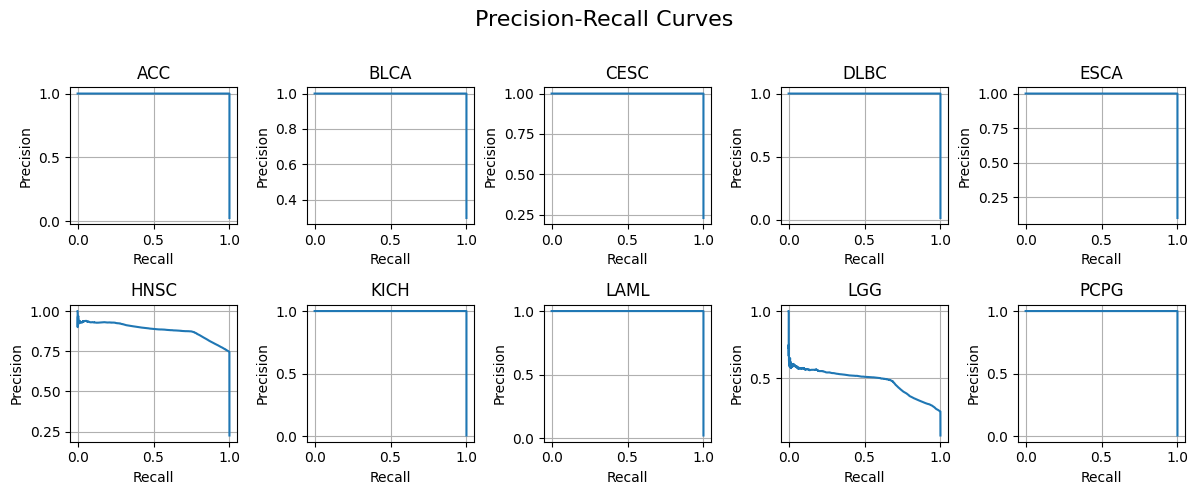

In [90]:
num = len(cancerTypes)
# Binarize labels
y_test_bin = label_binarize(y_test, classes=np.arange(num))

# Classes
class_names = list(class_labels.values())

# Plot curve
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Precision-Recall Curves", fontsize=16)
axs = axs.flatten()

for class_label in range(num):
  # Calculate precision/recall for current class
  xgb_precision, xgb_recall, _ = precision_recall_curve(y_test_bin[:, class_label], xgb_classifier.predict_proba(X_test)[:, class_label])

  # Plot current curve
  axs[class_label].plot(xgb_recall, xgb_precision) #, label=f"{class_names[class_label]}", color='r')
  axs[class_label].set_xlabel("Recall")
  axs[class_label].set_ylabel("Precision")
  axs[class_label].set_title(f"{class_names[class_label]}")
  #axs[class_label].legend(loc='best')
  axs[class_label].grid()

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

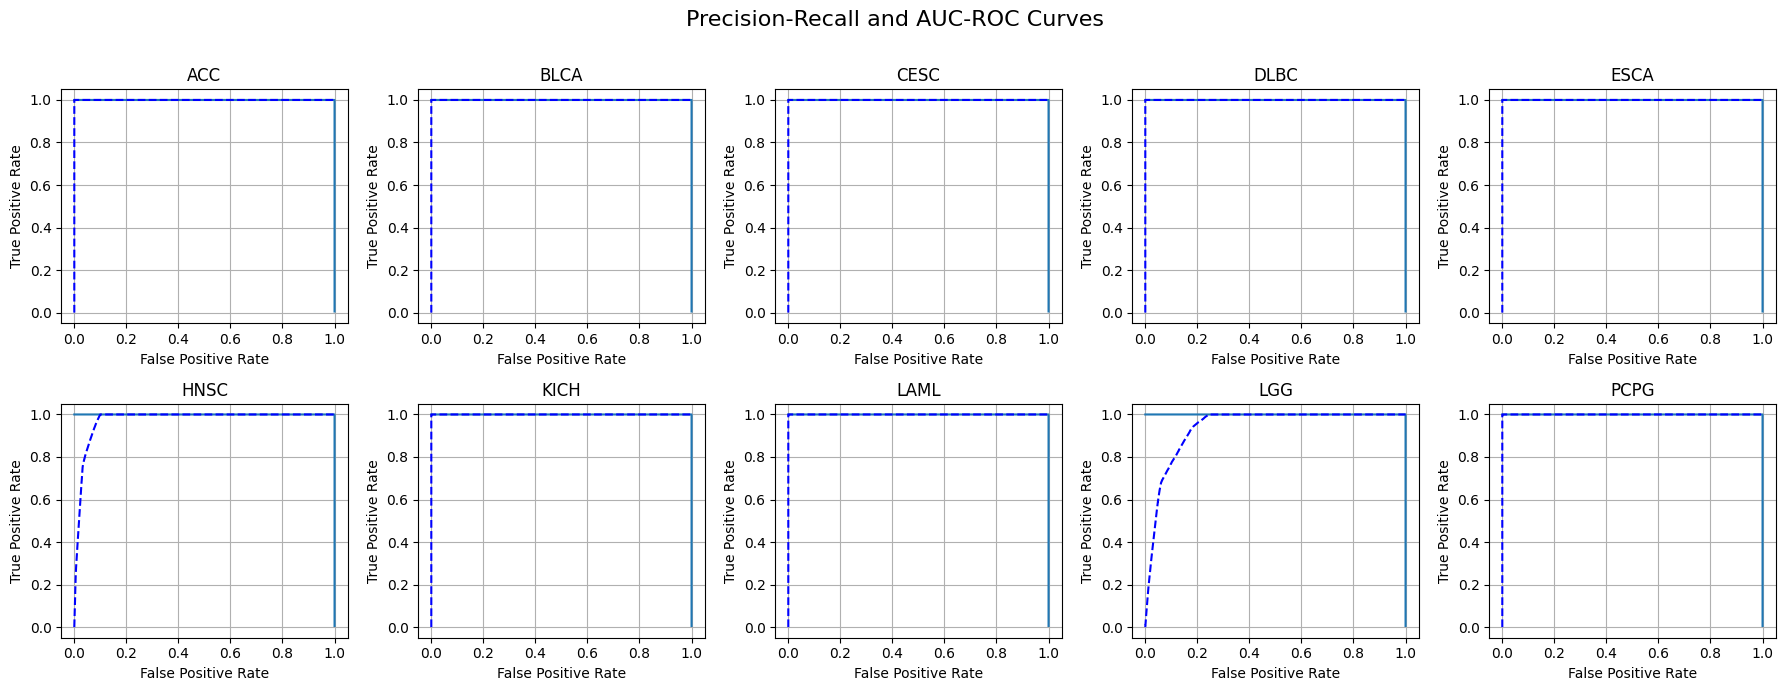

In [91]:
# Plot curve
fig, axs = plt.subplots(2, 5, figsize=(18, 7))
fig.suptitle("Precision-Recall and AUC-ROC Curves", fontsize=16)
axs = axs.flatten()

for class_label in range(num):
    # Calculate ROC curve for current class
    fpr, tpr, _ = roc_curve(y_test_bin[:, class_label], xgb_classifier.predict_proba(X_test)[:, class_label])

    # Calculate AUC for ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot Precision-Recall curve for the current class
    axs[class_label].plot(xgb_recall, xgb_precision) #, label=f"PR Curve ({class_names[class_label]})", color='r')
    axs[class_label].plot(fpr, tpr, label=f"AUC-ROC ({class_names[class_label]}) = {roc_auc:.2f}", color='b', linestyle='--')
    axs[class_label].set_xlabel("False Positive Rate")
    axs[class_label].set_ylabel("True Positive Rate")
    axs[class_label].set_title(f"{class_names[class_label]}")
    #axs[class_label].legend(loc='best')
    axs[class_label].grid()

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

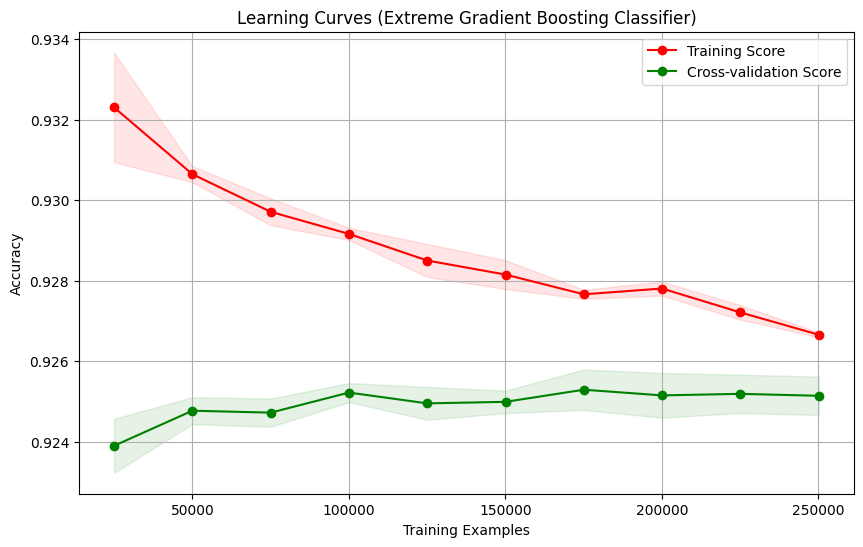

In [92]:
display_learning_curve(xgb_classifier, "Learning Curves (Extreme Gradient Boosting Classifier)")

In [93]:
dtree = DecisionTreeClassifier()
%timeit dtree.fit(X_train, y_train)

1.5 s ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
dtree_pred = dtree.predict(X_test)

In [95]:
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print(f"Decision Tree Classifier Accuracy: {dtree_accuracy:.4f}")

Decision Tree Classifier Accuracy: 0.9045


In [96]:
dtree_precision = precision_score(dtree_pred, y_test, average='macro')
print(f"Decision Tree Classifier Precision: {dtree_precision:.4f}")

Decision Tree Classifier Precision: 0.9178


In [97]:
# Calculate F1 score
dtree_f1 = f1_score(y_test, dtree_pred, average='macro')
print(f"Decision Tree Classifier F1 Score: {dtree_f1:.4f}")

Decision Tree Classifier F1 Score: 0.9177


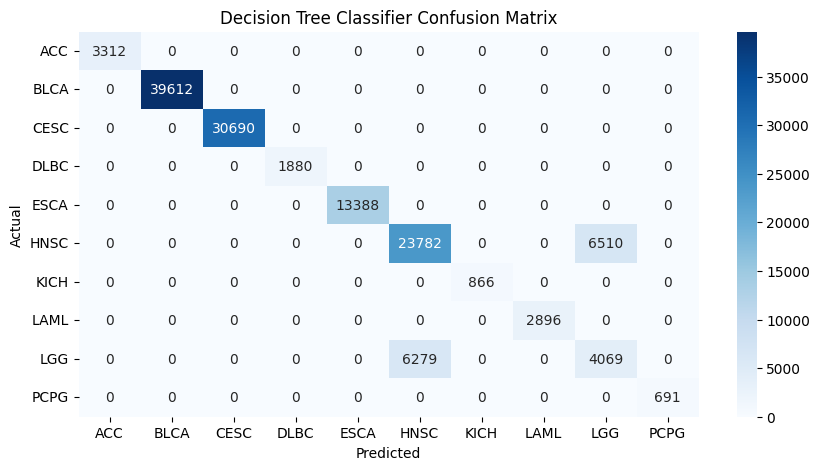

In [98]:
display_confusion_matrix(dtree_pred, "Decision Tree Classifier Confusion Matrix")

In [99]:
dtree_report = classification_report(y_test, dtree_pred)
print("\n Decision Tree Classifier Classification Report:\n")
print(dtree_report)


 Decision Tree Classifier Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3312
           1       1.00      1.00      1.00     39612
           2       1.00      1.00      1.00     30690
           3       1.00      1.00      1.00      1880
           4       1.00      1.00      1.00     13388
           5       0.79      0.79      0.79     30292
           6       1.00      1.00      1.00       866
           7       1.00      1.00      1.00      2896
           8       0.38      0.39      0.39     10348
           9       1.00      1.00      1.00       691

    accuracy                           0.90    133975
   macro avg       0.92      0.92      0.92    133975
weighted avg       0.91      0.90      0.90    133975



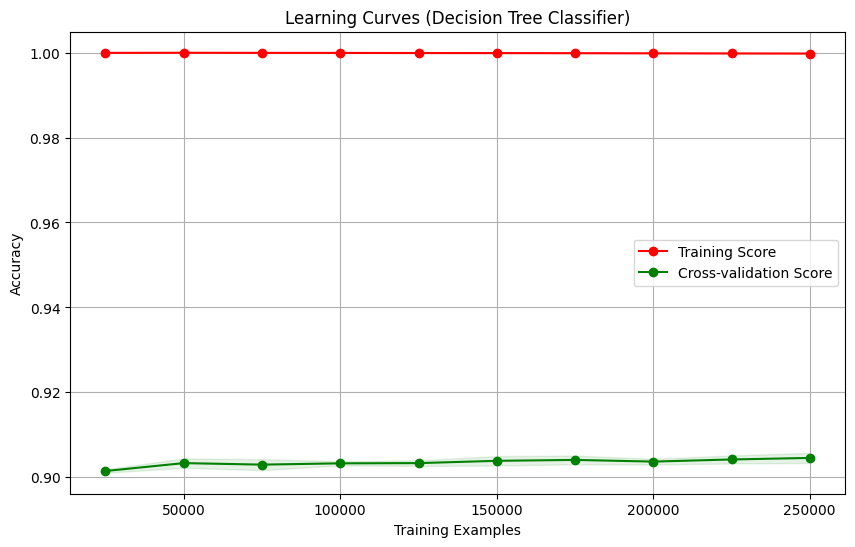

In [100]:
display_learning_curve(dtree, "Learning Curves (Decision Tree Classifier)")

In [101]:
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
%timeit knn.fit(X_train, y_train)  

130 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [102]:
knn_pred= knn.predict(X_test) 

In [103]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.4f}")

K-Nearest Neighbors Classifier Accuracy: 0.7390


In [104]:
knn_precision = precision_score(knn_pred, y_test, average='macro')
print(f"K-Nearest Neighbors Classifier Precision: {knn_precision:.4f}")

K-Nearest Neighbors Classifier Precision: 0.6748


In [105]:
# Calculate F1 score
knn_f1 = f1_score(y_test, knn_pred, average='macro')
print(f"K-Nearest Neighbors Classifier F1 Score: {knn_f1:.4f}")

K-Nearest Neighbors Classifier F1 Score: 0.6919


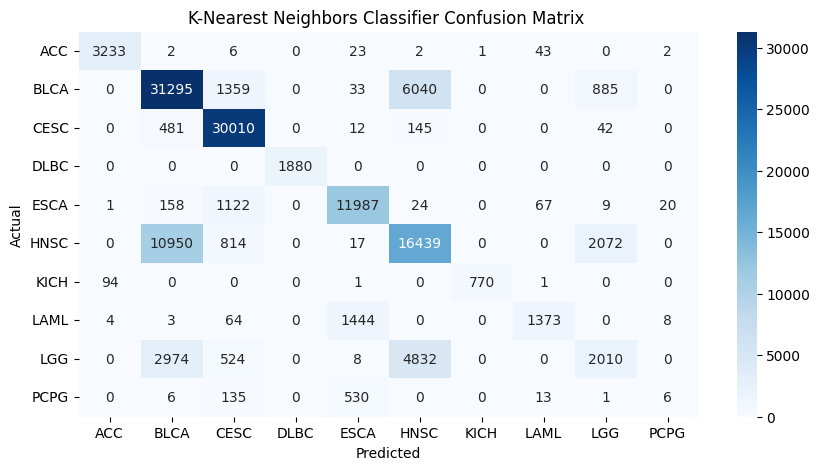

In [106]:
display_confusion_matrix(knn_pred, "K-Nearest Neighbors Classifier Confusion Matrix ")

In [107]:
knn_report = classification_report(y_test, knn_pred)
print("\n K-Nearest Neighbors Classifier Classification Report:\n")
print(knn_report)


 K-Nearest Neighbors Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3312
           1       0.68      0.79      0.73     39612
           2       0.88      0.98      0.93     30690
           3       1.00      1.00      1.00      1880
           4       0.85      0.90      0.87     13388
           5       0.60      0.54      0.57     30292
           6       1.00      0.89      0.94       866
           7       0.92      0.47      0.63      2896
           8       0.40      0.19      0.26     10348
           9       0.17      0.01      0.02       691

    accuracy                           0.74    133975
   macro avg       0.75      0.67      0.69    133975
weighted avg       0.72      0.74      0.72    133975



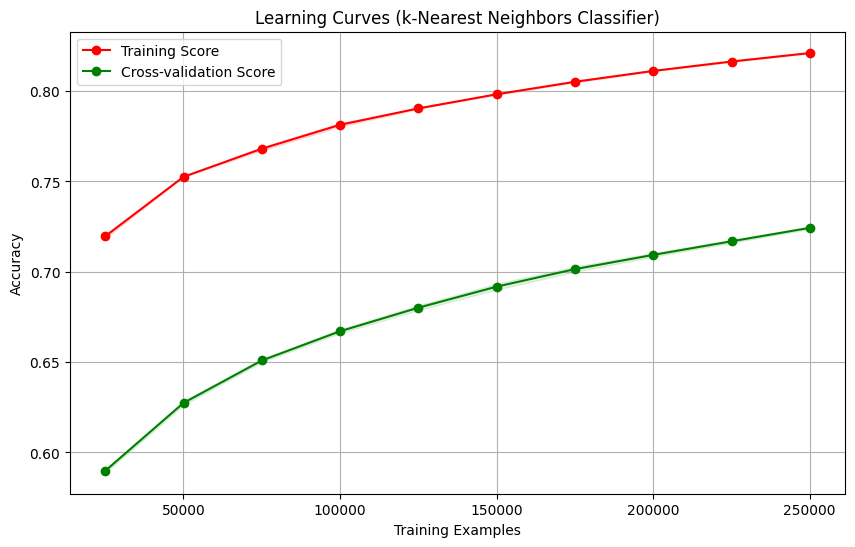

In [108]:
display_learning_curve(knn, "Learning Curves (k-Nearest Neighbors Classifier)")

In [109]:
# Fitting Naive Bayes to the Training set  
gnb = GaussianNB()  
%timeit gnb.fit(X_train, y_train)  

43.1 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
gnb_pred= gnb.predict(X_test) 

In [111]:
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print(f"Naive Bayes Classifier Accuracy: {gnb_accuracy:.4f}")

Naive Bayes Classifier Accuracy: 0.9167


In [112]:
gnb_precision = precision_score(gnb_pred, y_test, average='macro')
print(f"Naive Bayes Classifier Precision: {gnb_precision:.4f}")

Naive Bayes Classifier Precision: 0.9082


In [113]:
# Calculate F1 score
gnb_f1 = f1_score(y_test, gnb_pred, average='macro')
print(f"Naive Bayes Classifier F1 Score: {gnb_f1:.4f}")

Naive Bayes Classifier F1 Score: 0.9068


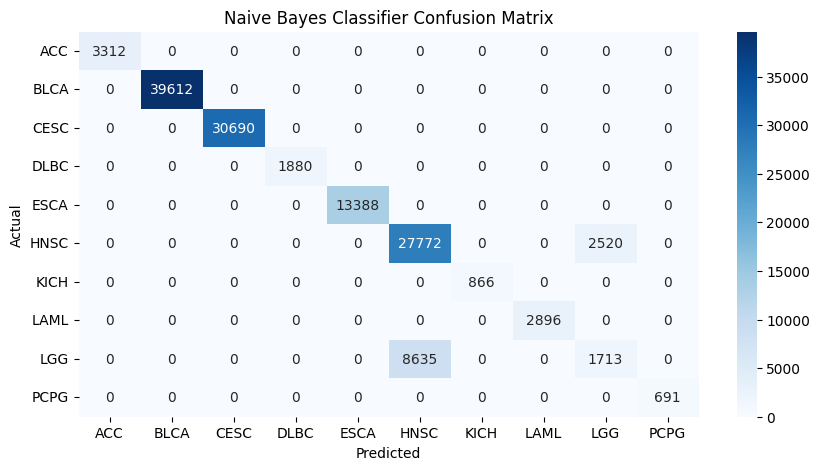

In [114]:
display_confusion_matrix(gnb_pred, "Naive Bayes Classifier Confusion Matrix")

In [115]:
gnb_report = classification_report(y_test, gnb_pred)
print("\n Naive Bayes Classifier Classification Report:\n")
print(gnb_report)


 Naive Bayes Classifier Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3312
           1       1.00      1.00      1.00     39612
           2       1.00      1.00      1.00     30690
           3       1.00      1.00      1.00      1880
           4       1.00      1.00      1.00     13388
           5       0.76      0.92      0.83     30292
           6       1.00      1.00      1.00       866
           7       1.00      1.00      1.00      2896
           8       0.40      0.17      0.23     10348
           9       1.00      1.00      1.00       691

    accuracy                           0.92    133975
   macro avg       0.92      0.91      0.91    133975
weighted avg       0.90      0.92      0.90    133975



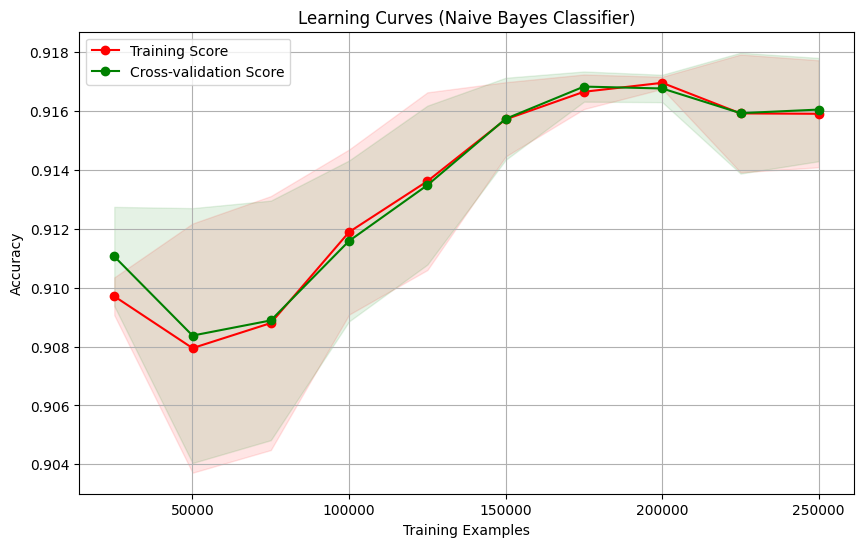

In [116]:
display_learning_curve(gnb, "Learning Curves (Naive Bayes Classifier)")

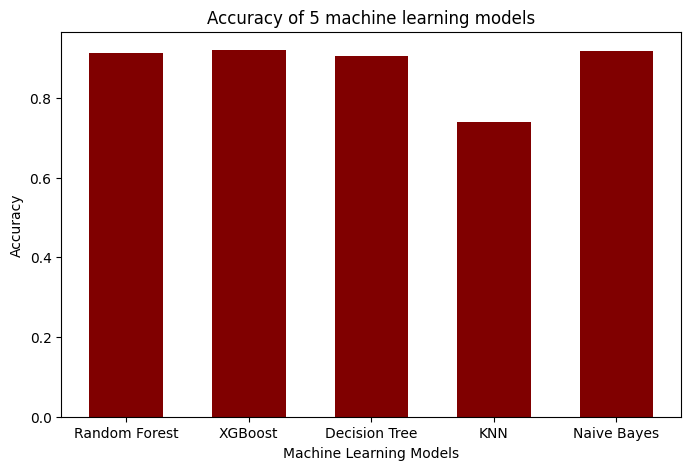

In [117]:
accuracy_model = {'Random Forest':0.9116, 'XGBoost':0.9201, 'Decision Tree':0.9047, 
        'KNN':0.7390,'Naive Bayes':0.9167}
models = list(accuracy_model.keys())
accuracy = list(accuracy_model.values())
 
fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(models, accuracy, color ='maroon', 
        width = 0.6)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of 5 machine learning models")
plt.show()

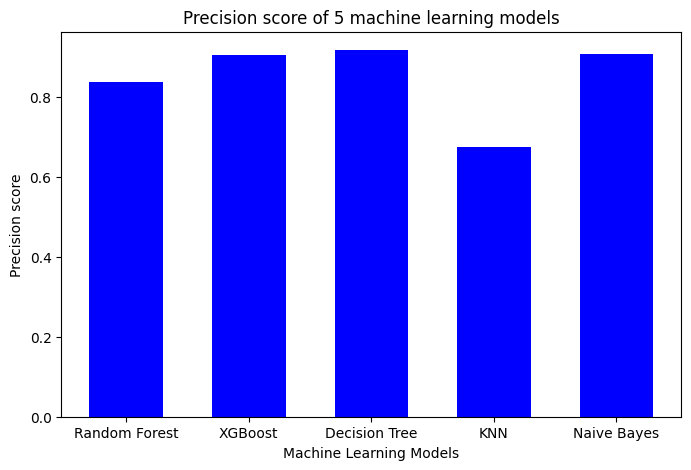

In [118]:
precisions_classifier = {'Random Forest':0.8388, 'XGBoost':0.9060, 'Decision Tree':0.9179, 
        'KNN':0.6748,'Naive Bayes':0.9082}
classifiers = list(precisions_classifier.keys())
precisions = list(precisions_classifier.values())
 
fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(classifiers, precisions, color ='blue', 
        width = 0.6)

plt.xlabel("Machine Learning Models")
plt.ylabel("Precision score")
plt.title("Precision score of 5 machine learning models")
plt.show()

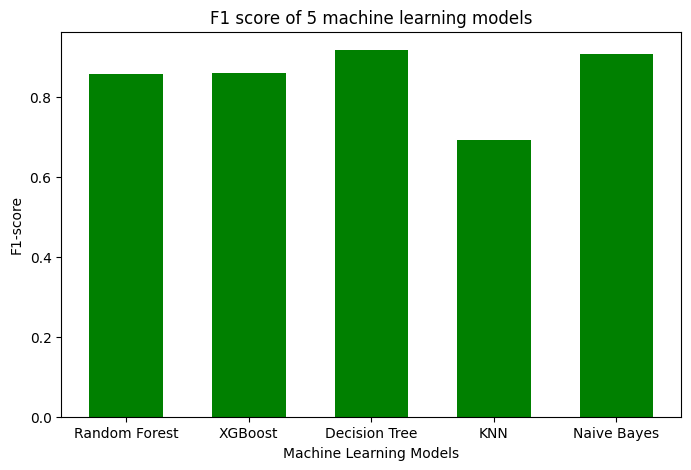

In [119]:
f1_score_classifier = {'Random Forest':0.8568, 'XGBoost':0.8609, 'Decision Tree':0.9178, 
        'KNN':0.6919,'Naive Bayes':0.9068}
classifiers = list(f1_score_classifier.keys())
f1_scores = list(f1_score_classifier.values())
 
fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(classifiers, f1_scores, color ='green', 
        width = 0.6)

plt.xlabel("Machine Learning Models")
plt.ylabel("F1-score")
plt.title("F1 score of 5 machine learning models")
plt.show()